 Sentiment Analysis of Product Reviews

Let's consider an example where we want to perform sentiment analysis on product reviews for a mobile phone

 Step 1: Data Collection
We collect product reviews from an online marketplace or social media platform. Each review is associated with a star rating (1 to 5) indicating the sentiment.

Step 2: Data Preprocessing
We preprocess the text data by removing special characters, converting text to lowercase, and removing stopwords.

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
import nltk
from nltk.corpus import stopwords
import string

# Sample product reviews
reviews = [
    "This phone is amazing! I love it.",
    "The battery life is terrible. Very disappointed.",
    "Great phone, excellent camera quality.",
    "The worst phone I've ever used. Avoid!",
    "Overall, a decent phone for the price."
]

# Convert text to lowercase
reviews = [review.lower() for review in reviews]

# Remove punctuation
translator = str.maketrans('', '', string.punctuation)
reviews = [review.translate(translator) for review in reviews]

# Tokenize the reviews
tokenized_reviews = [nltk.word_tokenize(review) for review in reviews]

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_reviews = [[word for word in review if word not in stop_words] for review in tokenized_reviews]


Step 3: Labeling
The star ratings are already provided as sentiment labels in the dataset.

Step 4: Model Training
We use Scikit-learn to train a simple Naive Bayes classifier on the preprocessed data.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

# Sample product reviews
product_reviews = [
    "The phone is overall decent for the price.",
    "This phone has a great camera and excellent quality.",
    "I love this phone; it's amazing!",
    "Avoid this phone; it's the worst I've ever used."
]

# Sample sentiment labels (star ratings): 1 to 5
star_ratings = [3, 5, 4, 1]

# Convert star ratings to binary sentiment labels (positive or negative)
binary_labels = [1 if rating >= 3 else 0 for rating in star_ratings]

# Preprocess the data: Tokenization and Lowercasing
tokenized_reviews = [review.lower().split() for review in product_reviews]

# Convert the tokenized_reviews into a bag-of-words representation using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([' '.join(review) for review in tokenized_reviews])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, binary_labels, test_size=0.2, random_state=42)

# Create and train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


Step 5: Real-time Sentiment Analysis
We implement the trained model to perform sentiment analysis on new product reviews.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.corpus import stopwords
import string

# Sample product reviews and their corresponding star ratings (sentiment labels)
product_reviews = [
    "The phone is overall decent for the price.",
    "This phone has a great camera and excellent quality.",
    "I love this phone; it's amazing!",
    "Avoid this phone; it's the worst I've ever used."
]

star_ratings = [3, 5, 4, 1]

# Convert star ratings to binary sentiment labels (positive or negative)
binary_labels = [1 if rating >= 3 else 0 for rating in star_ratings]

# Preprocess the data: Tokenization and Lowercasing
tokenized_reviews = [review.lower().split() for review in product_reviews]

# Convert the tokenized_reviews into a bag-of-words representation using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([' '.join(review) for review in tokenized_reviews])

# Create and train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X, binary_labels)

# Define the stopwords and punctuation to be removed
stop_words = set(stopwords.words('english'))
translator = str.maketrans('', '', string.punctuation)

# Function to perform sentiment analysis on a new review
def perform_sentiment_analysis(review):
    # Preprocess the review: Tokenization, Lowercasing, Stopword Removal, and Punctuation Removal
    review = review.lower().translate(translator)
    tokens = nltk.word_tokenize(review)
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Convert the filtered_tokens into a bag-of-words representation using the same vectorizer
    new_review_vectorized = vectorizer.transform([' '.join(filtered_tokens)])

    # Predict the sentiment using the trained classifier
    prediction = classifier.predict(new_review_vectorized)[0]

    # Return sentiment label
    return "Positive" if prediction == 1 else "Negative"

# Test the sentiment analysis function
new_review = "I'm very happy with the phone's performance."
sentiment = perform_sentiment_analysis(new_review)
print("Sentiment:", sentiment)



Sentiment: Positive



Step 6: Data Visualization using Power BI
After performing sentiment analysis on the reviews, we can use Power BI to visualize the overall sentiment distribution and create interactive dashboards.

In [10]:
import pandas as pd

# Sample product reviews and their corresponding sentiment labels (positive or negative)
product_reviews = [
    "The phone is overall decent for the price.",
    "This phone has a great camera and excellent quality.",
    "I love this phone; it's amazing!",
    "Avoid this phone; it's the worst I've ever used."
]

star_ratings = [3, 5, 4, 1]

# Convert star ratings to binary sentiment labels (positive or negative)
binary_labels = ['Positive' if rating >= 3 else 'Negative' for rating in star_ratings]

# Create a DataFrame with product_reviews and their corresponding sentiment labels
df = pd.DataFrame({'Review': product_reviews, 'Sentiment': binary_labels})

# Save the DataFrame to a CSV file
df.to_csv('sentiment_analysis_results.csv', index=False)


Visualization

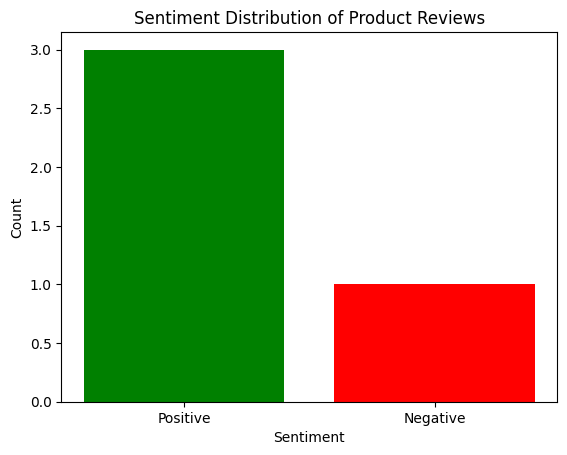

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Test the sentiment analysis function for all product reviews
sentiments = [perform_sentiment_analysis(review) for review in product_reviews]

# Count the number of positive and negative sentiments
positive_count = sentiments.count('Positive')
negative_count = sentiments.count('Negative')

# Data for visualization
sentiments_labels = ['Positive', 'Negative']
sentiments_counts = [positive_count, negative_count]

# Create a bar plot
plt.bar(sentiments_labels, sentiments_counts, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution of Product Reviews')
plt.show()
